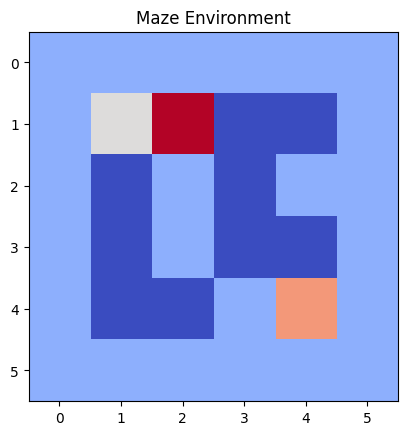

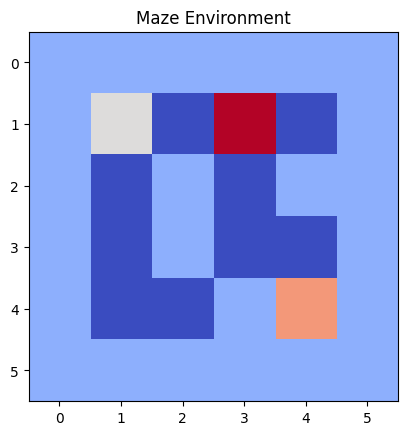

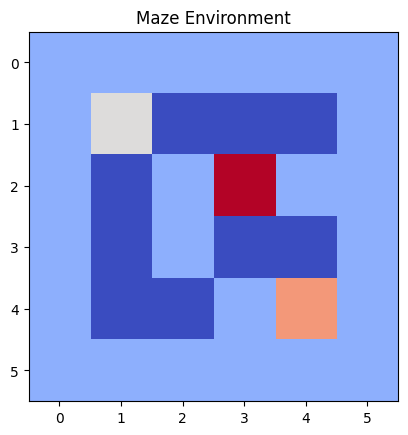

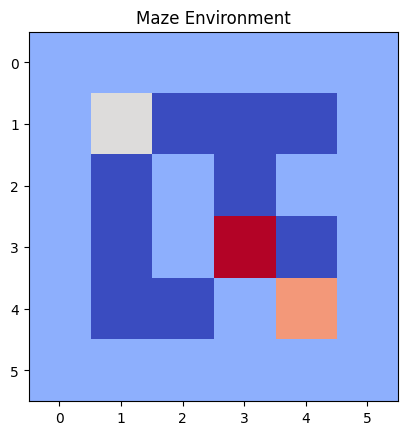

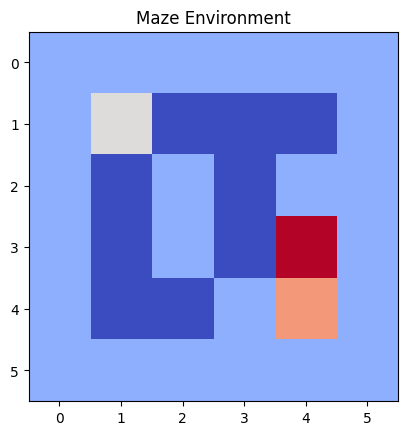

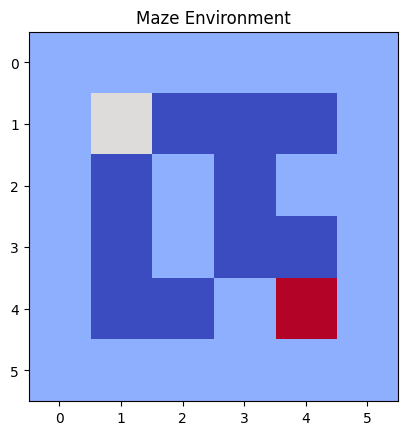

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the environment grid (0: Free space, 1: Wall, 2: Start, 3: Goal)
maze = np.array([
    [1, 1, 1, 1, 1, 1],
    [1, 2, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 3, 1],
    [1, 1, 1, 1, 1, 1]
])

# Visualization function to plot the maze
def plot_maze(maze, agent_pos=None):
    maze_copy = maze.copy()
    if agent_pos:
        maze_copy[agent_pos] = 4  # Mark the agent's position
    plt.imshow(maze_copy, cmap='coolwarm')
    plt.title("Maze Environment")
    plt.show()

# Maze dimensions
rows, cols = maze.shape

# Initialize Q-table with zeros (state space * actions)
Q_table = np.zeros((rows, cols, 4))  # 4 possible actions: Up, Down, Left, Right

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0  # Exploration rate
max_epsilon, min_epsilon = 1.0, 0.01
decay_rate = 0.005
actions = ['up', 'down', 'left', 'right']

# Reward system
def get_reward(state):
    return 100 if maze[state] == 3 else (-100 if maze[state] == 1 else -1)

# Agent movement logic
def take_action(state, action):
    row, col = state
    moves = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
    new_row, new_col = row + moves[action][0], col + moves[action][1]
    if 0 <= new_row < rows and 0 <= new_col < cols and maze[(new_row, new_col)] != 1:
        return (new_row, new_col)
    return state  # Stay in the same position if it's a wall

# Training the agent through episodes
def train_agent(num_episodes=1000):
    global epsilon
    for episode in range(num_episodes):
        state = tuple(np.argwhere(maze == 2)[0])  # Start at the initial position
        total_rewards = 0

        while maze[state] != 3:  # Continue until the goal is reached
            action_index = np.random.randint(0, 4) if random.random() < epsilon else np.argmax(Q_table[state])
            action = actions[action_index]
            new_state = take_action(state, action)
            reward = get_reward(new_state)

            # Q-learning update rule
            best_future_q = np.max(Q_table[new_state])
            Q_table[state][action_index] += learning_rate * (reward + discount_factor * best_future_q - Q_table[state][action_index])

            state = new_state
            total_rewards += reward

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * np.exp(-decay_rate * episode))  # Decay epsilon

# Test the trained agent's policy
def test_agent():
    state = tuple(np.argwhere(maze == 2)[0])  # Start at the initial position
    while maze[state] != 3:  # Continue until the goal is reached
        action_index = np.argmax(Q_table[state])
        action = actions[action_index]
        state = take_action(state, action)
        
        plot_maze(maze, state)  # Visualize agent's movement

train_agent()  # Train the agent
test_agent()   # Test the agent's learned policy
